# 1. Importing a dataframe and preparing its description
It is needed to import the dataset, remove redundant columns, set correct types, check existence of null-values

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("AppleStore.csv", usecols = [i + 1 for i in range(16)], index_col=0) # skipping first column
df

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,
281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187617475,Kubik,126644224,USD,0.00,142,75,4.5,4.5,1.3,4+,Games,38,5,1,1
1187682390,VR Roller-Coaster,120760320,USD,0.00,30,30,4.5,4.5,0.9,4+,Games,38,0,1,1
1187779532,Bret Michaels Emojis + Lyric Keyboard,111322112,USD,1.99,15,0,4.5,0.0,1.0.2,9+,Utilities,37,1,1,1


## As is seen, some columns are not properly identified for a type - changing this information according to description of columns and their possible values:
#### track_name -> string (column represents names of games, no other type is appropriate here)
#### currency -> category (it is more of a categorical type, but in this dataset there is only one currency - USD, seems not the best column here)
#### ver -> string (a column represents game version, string type is more appropriate here)
#### cont_rating -> category (rating here is categorical, has only few values in total)
#### prime_genre -> category (genre is also categorical and there are only few possible values here)
#### vpp_lic -> bool (despite of the fact that type is defined as int64, it has only True/False and according to column description it should be boolean value)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 281656475 to 1188375727
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   size_bytes        7197 non-null   int64  
 2   currency          7197 non-null   object 
 3   price             7197 non-null   float64
 4   rating_count_tot  7197 non-null   int64  
 5   rating_count_ver  7197 non-null   int64  
 6   user_rating       7197 non-null   float64
 7   user_rating_ver   7197 non-null   float64
 8   ver               7197 non-null   object 
 9   cont_rating       7197 non-null   object 
 10  prime_genre       7197 non-null   object 
 11  sup_devices.num   7197 non-null   int64  
 12  ipadSc_urls.num   7197 non-null   int64  
 13  lang.num          7197 non-null   int64  
 14  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 899.6+ KB


In [4]:
df['track_name'] = df['track_name'].astype('string')
df['currency'] = df['currency'].astype('category')
df['ver'] = df['ver'].astype('string')
df['cont_rating'] = df['cont_rating'].astype('category')
df['prime_genre'] = df['prime_genre'].astype('category')
df['vpp_lic'] = df['vpp_lic'].astype('bool')

#### Removing extra spaces in string types

In [5]:
df['track_name']=df['track_name'].str.strip()
df['ver'] = df['ver'].str.strip()

### Getting final info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 281656475 to 1188375727
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_name        7197 non-null   string  
 1   size_bytes        7197 non-null   int64   
 2   currency          7197 non-null   category
 3   price             7197 non-null   float64 
 4   rating_count_tot  7197 non-null   int64   
 5   rating_count_ver  7197 non-null   int64   
 6   user_rating       7197 non-null   float64 
 7   user_rating_ver   7197 non-null   float64 
 8   ver               7197 non-null   string  
 9   cont_rating       7197 non-null   category
 10  prime_genre       7197 non-null   category
 11  sup_devices.num   7197 non-null   int64   
 12  ipadSc_urls.num   7197 non-null   int64   
 13  lang.num          7197 non-null   int64   
 14  vpp_lic           7197 non-null   bool    
dtypes: bool(1), category(3), float64(3), int64(6), string(2)
m

#### Checking existence of undetected null-values

In [7]:
df.isnull().values.any()

False

In [8]:
df[(df['track_name'] == '') | (df['ver'] == '')]

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,


## Description of the dataset:
#### Number of observations: 7197.
#### Number of variables: 15 without ID (there was another one no-name column in .csv-file but as no description is given for this column, the column was skipped).
#### Number of empty values: 0 - checked by df.info() and df.isnull().values.any(). It still can not guarantee absence of empty string values; thus this aspect was checked differently: by stripping all values and trying to find any empty values.
As for the data types, track_name and ver have to be strings as they cannot be properly represented by other types (and have quite much possible values). Columns size_bytes, rating_count_tot, rating_count_ver, sup_devices.num, ipadSc_urls.num and lang.num are all integers as they represent quantity/amount. Column price can only be of a float type (or even in more precise data type). Columns user_rating and user_rating_ver can be in float (with a scale [0-5]), but I guess they potentially can be of categorical type, too, if we do consider that only those ratings are possible (there are only values 0, 0.5, 1,...), but it mostly depends on the task which we are solving, so currently it is quite difficult to determing the most appropriate type here. Columns currency, cont_rating and prime_genre are, of course, categories as there are only few values for all these columns and they can be treated as categories.

In [9]:
df['user_rating'].value_counts()

4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: user_rating, dtype: int64

# 2. Performing analysis

## Which primary genres are more and less popular?

Task: find the most and the least popular genres. To accomplish this task it is possible to group the dataframe by a prime_genre and select sum of rating_count_tot. Although some intersections of users will be found, it is still one of the most adequate aggregate functions which can be used here and it will still show the tendency. Moreover, it is possible to add new column - "Percentage" to see "the share of a genre on a market" (or more concisely, the share of ratings of the genre from all the ratings).
The results can be presented either through the table (prime_genre, rating_count_tot) or through a horizontal bar chart (but due to big quantity of genres, the bar chart is still not the best solution here

In [10]:
total_rating_count = df['rating_count_tot'].sum()

In [11]:
rating=df.groupby("prime_genre")[['rating_count_tot']].agg('sum').sort_values(by='rating_count_tot')
rating["Percentage"]=(rating["rating_count_tot"] / total_rating_count) * 100
rating

,rating_count_tot,Percentage
prime_genre,,
Medical,13634,0.014693
Catalogs,17325,0.018671
Business,272921,0.294127
Navigation,545282,0.587650
Book,574049,0.618652
Food & Drink,878133,0.946363
Lifestyle,887294,0.956236
News,976130,1.051975
Education,1014371,1.093187


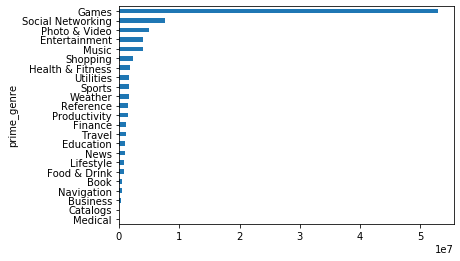

In [12]:
df.groupby("prime_genre")['rating_count_tot'].agg('sum').sort_values().plot.barh()

### Results:
The outstanding genre is Games - this genre is more popular than all the other genres together and 57% of ratings are given to games. Other most popular genres include social networking, photo & video, entertainment and music having 4,2-8,2%% of ratings. The least popular genres are medical and catalogs - less than 0.02% of ratings are given to them. Other least popular genres include business, navigation and book (all have less than 0.62%)

## How do you visualize price distribution of paid apps, please, descripe the shape of it?

Task: visualize price distribution of paid apps and determine its shape. To perform this task the variable 'price' is needed. Firstly, it is needed to filter out zero-price rows and if there are still some extreme values, they have to be cut off for proper visualization (boxplots can be helpful here). For visualization, distribution plot can be used. Such metrics as skewness and kurtosis have to be evaluated to properly describe the shape.

In [13]:
paid_apps = df[df['price']>0][['price']]

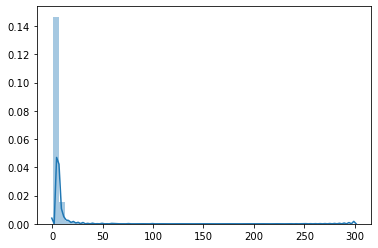

In [14]:
sns.distplot(paid_apps)

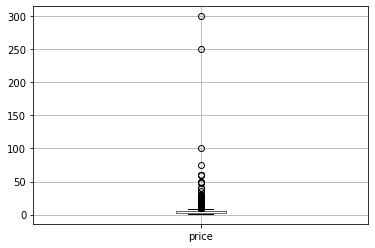

In [15]:
paid_apps.boxplot()

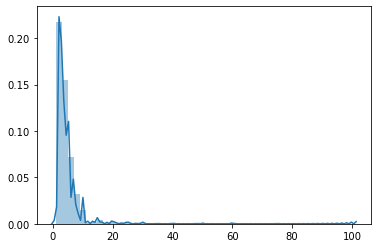

In [16]:
paid_apps = paid_apps[paid_apps['price']<150]
sns.distplot(paid_apps)

In [17]:
paid_apps['price'].skew()

8.016784106410277

In [18]:
paid_apps['price'].kurtosis()

107.37312265863149

### Result:
According to visualizations and calculated parameters, we have a highly skewed leptokurtic distribution with positive skewness (skewness > 8, kurtosis > 100) for price. However, cutting off a bigger amount of extreme values can potentially lead to a bit more different result but the main trend would still be the same.

## How does the price distribution get affected by category? (assuming only paid apps, and genre as a category)

Task: evaluate affect of category on the price distribution. Columns 'price' and 'genre' are needed. Since the comparison of more than 20 plots is a cumbersome task, the task can be accomplished by evaluating skewness and kurtosis for every single category and comparing the category values on bar charts. Additionaly, the description table for prices of each category can be built, which shows mean value, quartiles, min and max values.

In [19]:
price_by_category = df[df['price']>0].groupby("prime_genre")[['price']]

In [20]:
price_by_category.describe()

price                                                 \
                    count       mean        std   min   25%   50%    75%   
prime_genre                                                                
Book                 46.0   4.359565   4.013082  0.99  2.99  3.99   5.74   
Business             37.0   7.881892  11.871497  0.99  2.99  4.99   7.99   
Catalogs              1.0   7.990000        NaN  7.99  7.99  7.99   7.99   
Education           321.0   5.684704  22.042295  0.99  2.99  2.99   3.99   
Entertainment       201.0   2.368109   1.458190  0.99  0.99  1.99   2.99   
Finance              20.0   2.190000   1.609184  0.99  0.99  0.99   3.24   
Food & Drink         20.0   4.890000   5.857070  0.99  1.99  3.99   4.99   
Games              1605.0   3.447944   2.816323  0.99  0.99  2.99   4.99   
Health & Fitness    104.0   3.316923   1.621711  0.99  1.99  2.99   3.99   
Lifestyle            50.0   2.550000   1.430855  0.99  0.99  1.99   3.99   
Medical              15.0  13.456667  10.742882  0.99  3.99  9.99  22.49   
Music                71.0   9.398451  10.586484  0.99  2.99  4.99  10.99   
Navigation           26.0   7.297692  14.720786  0.99  1.99  2.99   4.99   
News                 17.0   2.284118   1.263166  0.99  0.99  1.99   2.99   
Photo & Video       182.0   2.825165   2.482040  0.99  0.99  1.99   2.99   
Productivity        116.0   6.645172  10.111641  0.99  1.99  4.99   7.99   
Reference            44.0   7.035455   9.205546  0.99  1.99  2.99   5.49   
Shopping              1.0   1.990000        NaN  1.99  1.99  1.99   1.99   
Social Networking    24.0   2.365000   2.102018  0.99  0.99  0.99   2.99   
Sports               35.0   3.104286   3.546095  0.99  1.49  1.99   2.99   
Travel               25.0   3.630000   2.531139  0.99  0.99  3.99   4.99   
Utilities           139.0   2.939640   2.922486  0.99  1.49  1.99   2.99   
Weather              41.0   2.819268   1.563689  0.99  1.99  2.99   2.99   

                           
                      max  
prime_genre                
Book                27.99  
Business            59.99  
Catalogs             7.99  
Education          299.99  
Entertainment        9.99  
Finance              5.99  
Food & Drink        27.99  
Games               29.99  
Health & Fitness     9.99  
Lifestyle            4.99  
Medical             34.99  
Music               49.99  
Navigation          74.99  
News                 3.99  
Photo & Video       22.99  
Productivity        99.99  
Reference           47.99  
Shopping             1.99  
Social Networking    9.99  
Sports              19.99  
Travel               9.99  
Utilities           24.99  
Weather              9.99

##### Unfortunately, Catalogs and Shopping have only 1 value, so they are not really representative and cannot be properly considered
#### Building bar charts for skewness and kurtosis:

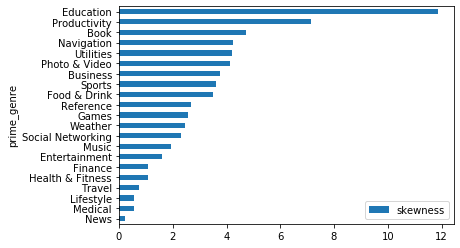

In [21]:
df[df['price']>0].groupby("prime_genre")[['price']].agg(lambda x: x.skew()).drop(labels=["Catalogs", "Shopping"]).rename(columns={'price':'skewness'}).sort_values(by='skewness').plot.barh()

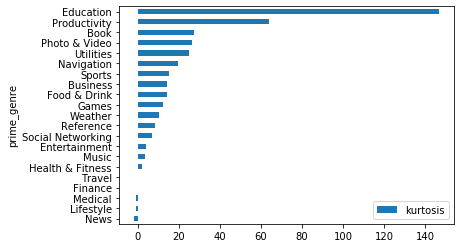

In [22]:
df[df['price']>0].groupby("prime_genre")[['price']].agg(lambda x: x.kurtosis()).drop(labels=["Catalogs", "Shopping"]).rename(columns={'price':'kurtosis'}).sort_values(by='kurtosis').plot.barh()

#### Comparing visualized distribution of categories with the highest (Education) and the lowest (News) skewness and kurtosis

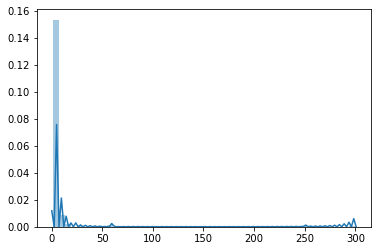

In [23]:
sns.distplot(df[(df['price']>0) & (df['prime_genre']=='Education')][['price']])

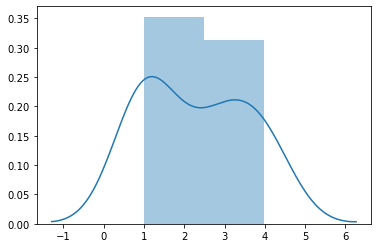

In [24]:
sns.distplot(df[(df['price']>0) & (df['prime_genre']=='News')][['price']])

### Result:
As is seen, the category has a significant influence upon the price distribution: for instance, while price for Education apps has highly skewed distribution, the price for News, in turn, has the Bimodal distribution with far less kurtosis and skewness parameters. Depending on the category, the kurtosis can be positive (most of genres), equal to zero (Travel and Finance) and negative (Medical, Lifestyle, News). Nevertheless, for all the categories skewness is positive which means that most values are concentrated nearly the lowest bound of values.
It is also worth mentioning that here skewness and kurtosis highly correlate, and their rankings for genres are almost similar.
Another interesring point is the dispersion of price of different categories. It is seen that categories with a very high dispresion include Education and Navigation whose standard deviation is 22 and 15 resprectively, which means that their prices vary quite significantly. In comparison, most genres (62%) have standard deviation less than 4, so their price differs far less significantly. And the most relevant examples of there groups are Education and News here, which distribution plots are presented above

## As the size of the app increases do they get pricier?

Task: determine the correlation between the size of the app and its price. Needed columns: size_bytes, cost. Task can be performed through creating correlation matrix and evaluating the correlation result. As values differ significantly, normalization can be used.

In [25]:
size_cost_df = df[['size_bytes','price']]

In [26]:
size_cost_df = (size_cost_df-size_cost_df.mean())/size_cost_df.std()

In [27]:
size_cost_df.corr()

,size_bytes,price
size_bytes,1.000000,0.182392
price,0.182392,1.000000


### Result:
As is seen, the correlation is only 0,18 what is known to be a very low correlation value, so it is possible to say that there is almost know correlation between them. However, it is also impossible to say the opposite as prices also do not go down when the app size increases. To sum up, it is only possible to say that when the size of the app increases the price does not increase generally but in other cases has a better chance to grow than to decrease.

## How are the apps distributed content-rating wise?

Task: define how apps are distributed by content-rating categories. Needed columns: cont_rating. To solve the task, it is possible to group a dataset by the category, define the quantity of rows (as the quantity of apps) in each group and compare groups by these parameter. As a visualization, pie chart is the most approprate chart here

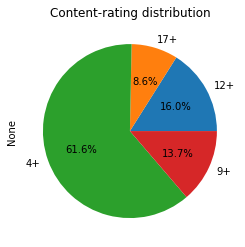

In [28]:
cont_rating_df = df.groupby('cont_rating').size().plot(kind='pie', title = 'Content-rating distribution',autopct='%1.1f%%')

### Result:
Most apps (>61%) are developed for category 4+. 9+ and 12+ are nearby each other and have 14% and 16% correspondingly, while 17+ category has the lowest quantity of apps published (only 8,6%).

## Find the most popular genres in each content rating group

Task: determine most popular genres in each content-rating group. Needed columns: cont_rating, prime_genre and rating_count_tot. The dataset can be grouped by a content-rating group and the genres. Based on this groupping the popularity can be evaluated. The results can be presented either in a table or in a stacked bar chart

In [29]:
grouped = df.groupby(['cont_rating','prime_genre'])[['rating_count_tot']].agg('sum')

In [30]:
grouped['rating_count_tot'].groupby('cont_rating', group_keys=False).nlargest(3)

cont_rating  prime_genre      
12+          Games                 8926422
             Photo & Video         3137309
             Music                 3078365
17+          Games                 2814848
             Social Networking      831112
             Utilities              638050
4+           Games                28477091
             Social Networking     5200312
             Entertainment         2123202
9+           Games                12660130
             Entertainment          462996
             Music                  228465
Name: rating_count_tot, dtype: int64

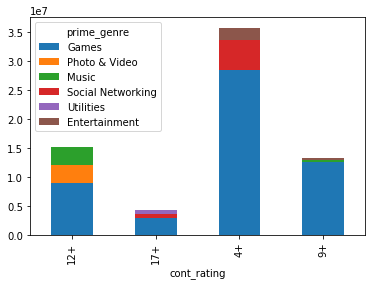

In [31]:
grouped['rating_count_tot'].groupby('cont_rating', group_keys=False).nlargest(3).unstack().plot(kind='bar', stacked=True)

### Results:
The most popular genre (with very significant outweigh) among all content rating groups is Games. Social networking take some portion at 4+ and 17+ groups, while Music and Photo & Video take significant share at 12+ group. A relatively small shares are taken by Utilities and Entertainment.

## Describe the main characteristics of the apps with the biggest size

Task: to describe main characteristics of apps which has the greatest size in bytes. Column to filter on: size_bytes. Other columns can be used to gather info. Firstly, the dataset has to be filtered: 0.95 or 0.98 percentiles of size_bytes can be used for this. The description table can be built to show mean, std, median and quartiles. Distribution plots can visualize distribution of price, rating count, user rating and number of languages supported. Due to small number of groups, content-rating distribution and Vpp Device Based Licensing can be visualized through pie charts. Such characteristics as genres and number of screenshots can be shown through the bar chart.

In [32]:
biggest_apps=df[df['size_bytes']>df.size_bytes.quantile(0.98)]
biggest_apps

,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
id,,,,,,,,,,,,,,,
442522082,Modern Combat 3: Fallen Nation,1978085376,USD,6.99,23766,582,4.5,4.5,1.5.0,17+,Games,43,5,12,True
453051448,Gangstar Rio: City of Saints,1820196864,USD,6.99,14724,1043,4.5,4.5,1.4.1,17+,Games,43,5,12,True
454136236,STEINS;GATE,1551412224,USD,24.99,16,0,4.0,0.0,1.71,12+,Games,37,0,1,True
474764934,N.O.V.A. 3 - Near Orbit Vanguard Alliance,1984958464,USD,6.99,13503,825,4.5,4.5,1.0.5,17+,Games,43,5,12,True
480375355,The Bard's Tale,1807310848,USD,2.99,4746,455,4.5,4.5,1.8.1,12+,Games,43,5,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148321705,Bully: Anniversary Edition,2413393920,USD,6.99,1334,305,4.5,4.5,1.04,12+,Games,37,5,7,True
1153028211,Demon's Rise 2: Lords of Chaos,2205314048,USD,7.99,39,11,4.5,4.0,1.31,12+,Games,37,5,1,True
1155982200,Ire - Blood Memory,1669448704,USD,0.00,373,7,3.5,4.5,2.2.1,12+,Games,37,5,13,True


In [33]:
biggest_apps.describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num
count,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2.123698e+09,6.859583,15150.548611,582.243056,3.656250,3.604167,35.131944,4.229167,5.125000
std,6.929179e+08,6.470737,64163.603215,2365.431391,1.413557,1.530431,6.497172,1.704452,4.619622
min,1.354634e+09,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000000,1.000000
25%,1.562608e+09,2.990000,53.750000,13.750000,3.500000,3.500000,35.750000,5.000000,1.000000
50%,1.932122e+09,6.490000,257.500000,64.000000,4.000000,4.000000,37.000000,5.000000,4.000000
75%,2.428626e+09,8.490000,2808.500000,296.000000,4.500000,4.500000,39.000000,5.000000,8.000000
max,4.025970e+09,39.990000,612532.000000,25716.000000,5.000000,5.000000,43.000000,5.000000,18.000000


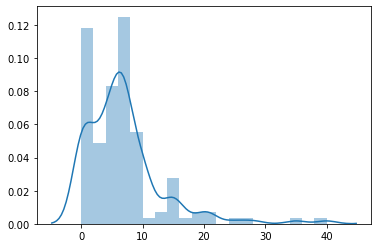

In [34]:
sns.distplot(biggest_apps[['price']])

In [35]:
biggest_apps.rating_count_tot.quantile([0.12,0.25,0.5,0.75,0.88])

0.12        1.16
0.25       53.75
0.50      257.50
0.75     2808.50
0.88    16692.48
Name: rating_count_tot, dtype: float64

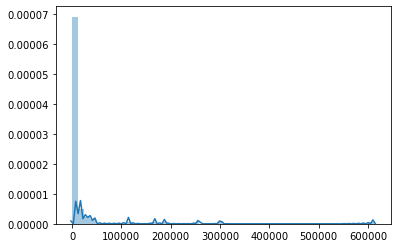

In [36]:
sns.distplot(biggest_apps[['rating_count_tot']])

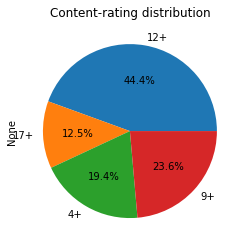

In [37]:
biggest_apps.groupby('cont_rating').size().plot(kind='pie', title = 'Content-rating distribution',autopct='%1.1f%%')

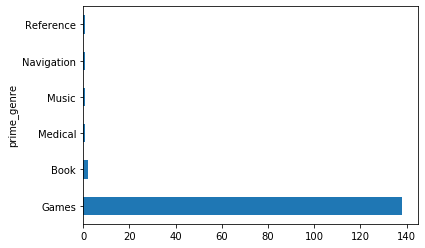

In [38]:
biggest_apps.groupby('prime_genre').size().nlargest(6).plot.barh()

In [39]:
biggest_apps['prime_genre'].value_counts()

Games                138
Book                   2
Reference              1
Navigation             1
Medical                1
Music                  1
Food & Drink           0
Productivity           0
Utilities              0
Travel                 0
Sports                 0
Social Networking      0
Shopping               0
Catalogs               0
Photo & Video          0
Finance                0
News                   0
Education              0
Business               0
Entertainment          0
Lifestyle              0
Health & Fitness       0
Weather                0
Name: prime_genre, dtype: int64

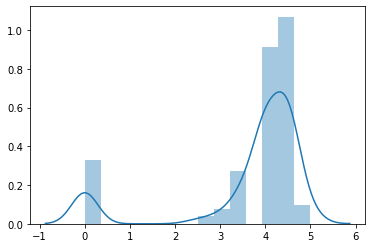

In [40]:
sns.distplot(biggest_apps[['user_rating']])

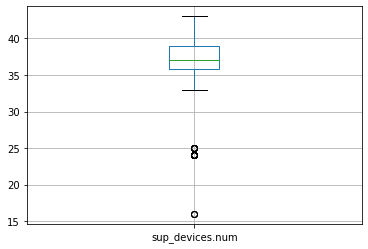

In [41]:
biggest_apps[['sup_devices.num']].boxplot()

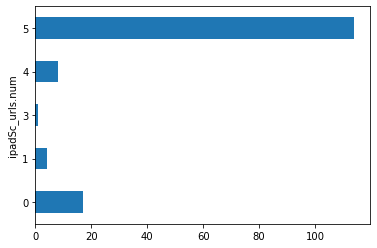

In [42]:
biggest_apps.groupby('ipadSc_urls.num').size().plot.barh()

In [43]:
biggest_apps['ipadSc_urls.num'].value_counts()

5    114
0     17
4      8
1      4
3      1
Name: ipadSc_urls.num, dtype: int64

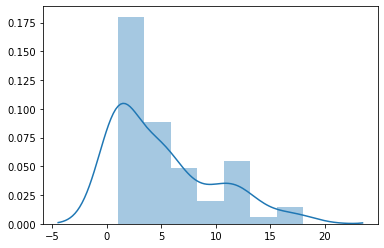

In [44]:
sns.distplot(biggest_apps[['lang.num']])

In [45]:
biggest_apps['lang.num'].value_counts()

1     56
5     17
4     14
12     7
6      7
11     7
2      6
7      6
13     5
10     5
8      4
9      2
17     2
18     2
15     2
16     1
3      1
Name: lang.num, dtype: int64

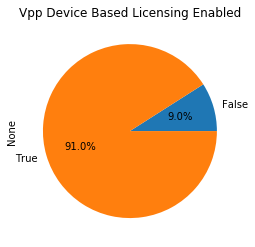

In [46]:
biggest_apps.groupby('vpp_lic').size().plot(kind='pie', title = 'Vpp Device Based Licensing Enabled',autopct='%1.1f%%')

### Result:
The highest 2 percentiles of big apps consist of 144 apps. As for their price, it is seen that the distribution is skewed here to a bigger value in comparison with price distribution for all the apps - most big apps have the price in range [3$, 8.5$]. Rating count is highly dispersed for this app group: while median value for rating count is 257, the approximate decile ratio is 16692.48 / 1.16 and the actual decile ratio value is even impossible to calculate as 10 percentile has a value equals to 0. As for content-rating distribution, most apps (44%) are developed for 12+, 43% of apps are developed either for 4+ or for 9+, while the apps for 17+ have the least share (12.5% only). The overwhelming majority of apps (138/144) are of Games genre, only 2 apps are of Books genre, while such genres as Reference, Navigation, Medical and Music have only one representative in this group of apps. Other genres are not represented at all. As for the rating, the median value is 4 here with 25% equals to 3.5 and 75% equals to 4.5. Most such apps (>50%) support from 35 to 39 of devices while the group contains outliers which support less than 25 devices. The number of screenshots showed is 5 in most cases (>79%), however nearly 12% of apps do not show any screenshots. As for the languages, more than 25% of apps support only one language and, in general, with increase of languages supported, number of apps with such language support decreases, but for some reason the quantity of apps supporting from 11 to 13 is unexpectedly high (19 apps) which slightly breaks this tendency. As for the latest property "Vpp Device Based Licensing", it is seen that this licesing is enabled in 91% apps.

## Compare the characteristics of free and non-free apps

Task: Compare the characteristics of apps with price = 0 and apps with price > 0. Variable to filter: price. All other variables besides name and id can be used for comparison. Firstly, it is needed to divide the dataset on 2 groups and then compare their main characteristics. The easiest way is to add the column price with values 0/1 (for free/non-free) to easily make comparison based on groupby.
- rating count can be compared on a distribution plot and through a description table
- content-rating distribution can be compared with the help of pie charts
- genres of apps can also be compared with the help of pie chart but due to the fact that there are quite many possible genres, it is better to define top n-genres and represent all genres besides these n as 'Others' (to make these charts readable)
- user ratings can be compared on bar charts as marks are limited (0, 0.5, 1,...)
- supported device count is easier to compare through the description table
- number of screenshots can be compared on bar charts as number of screenshots are limited to values 0,1,2,3,4,5
- number of supported languages can be compared on distribution graph
- vpp device based licensing is better to compare through pie charts as only 2 values are possible

In [47]:
df['is_free'] = df.apply(lambda x: x.price == 0, axis=1)

In [48]:
df.groupby('is_free').size()

is_free
False    3141
True     4056
dtype: int64

In [49]:
free_apps = df.loc[df['is_free']]

In [50]:
paid_apps = df.loc[~df['is_free']]

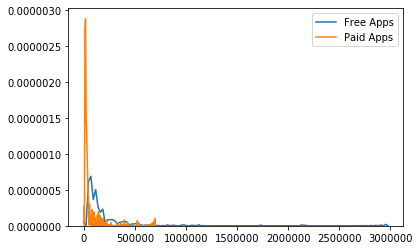

In [51]:
plt.figure("Test Plots")

sns.distplot(free_apps[['rating_count_tot']], label='Free Apps', hist=False)
sns.distplot(paid_apps[['rating_count_tot']], label='Paid Apps', hist=False)

plt.legend()
plt.show()

In [52]:
df.groupby('is_free')[['rating_count_tot']].describe()

rating_count_tot                                                \
                   count          mean           std  min   25%    50%   
is_free                                                                  
False             3141.0   4038.537090  25869.299527  0.0  31.0  193.0   
True              4056.0  19749.804734  97744.279930  0.0  22.0  466.0   

                             
             75%        max  
is_free                      
False    1335.00   698516.0  
True     5450.75  2974676.0

In [53]:
free_apps[['rating_count_tot']].quantile([0.15,0.30,0.5,0.75,0.95])

,rating_count_tot
0.15,0.00
0.30,56.00
0.50,466.00
0.75,5450.75
0.95,97612.00


In [54]:
paid_apps[['rating_count_tot']].quantile([0.15,0.30,0.5,0.75,0.95])

,rating_count_tot
0.15,10.0
0.30,47.0
0.50,193.0
0.75,1335.0
0.95,14202.0


Text(0.5, 1.0, 'Content-rating distribution for paid apps')

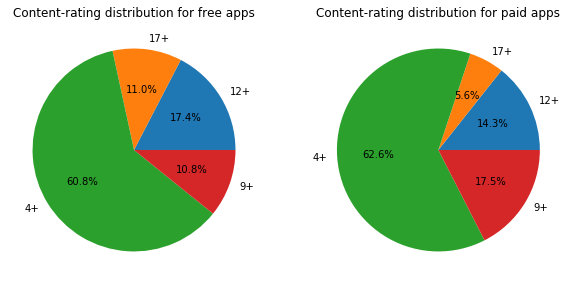

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].pie(free_apps.groupby('cont_rating').size(), autopct='%1.1f%%', labels=free_apps.groupby('cont_rating').size().index)
axes[0].set_title('Content-rating distribution for free apps')
axes[1].pie(paid_apps.groupby('cont_rating').size(), autopct='%1.1f%%', labels=free_apps.groupby('cont_rating').size().index)
axes[1].set_title('Content-rating distribution for paid apps')

In [56]:
main_free_genres=free_apps['prime_genre'].value_counts()[:6]

In [57]:
main_free_genres = main_free_genres.append(pd.Series([free_apps['prime_genre'].value_counts().sum()-main_free_genres.sum()],index=['Others']))

<ipython-input-57-e663f6ffc467>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_free_genres = main_free_genres.append(pd.Series([free_apps['prime_genre'].value_counts().sum()-main_free_genres.sum()],index=['Others']))


In [58]:
main_paid_genres = paid_apps['prime_genre'].value_counts()[:6]

In [59]:
main_paid_genres = main_paid_genres.append(pd.Series([paid_apps['prime_genre'].value_counts().sum()-main_paid_genres.sum()],index=['Others']))

<ipython-input-59-151eb8503c99>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_paid_genres = main_paid_genres.append(pd.Series([paid_apps['prime_genre'].value_counts().sum()-main_paid_genres.sum()],index=['Others']))


Text(0.5, 1.0, 'Genre distribution for paid apps')

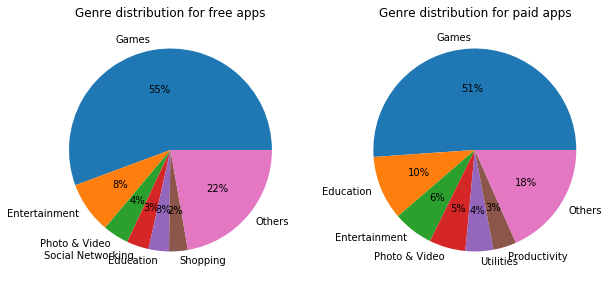

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].pie(main_free_genres, autopct='%1d%%', labels=main_free_genres.index)
axes[0].set_title('Genre distribution for free apps')
axes[1].pie(main_paid_genres, autopct='%1d%%', labels=main_paid_genres.index)
axes[1].set_title('Genre distribution for paid apps')

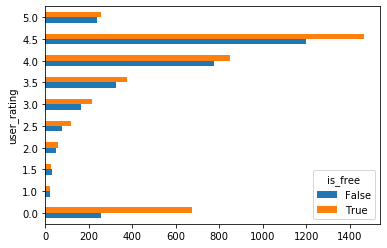

In [61]:
df.groupby(['user_rating'])['is_free'].value_counts().unstack().plot(kind='barh')

In [62]:
df.groupby('is_free')[['sup_devices.num']].describe()

sup_devices.num                                                   
                  count       mean       std   min   25%   50%   75%   max
is_free                                                                   
False            3141.0  37.276027  4.553283  11.0  37.0  38.0  40.0  47.0
True             4056.0  37.428254  2.954281   9.0  37.0  37.0  38.0  47.0

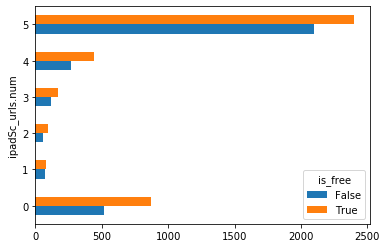

In [63]:
df.groupby(['ipadSc_urls.num'])['is_free'].value_counts().unstack().plot(kind='barh')

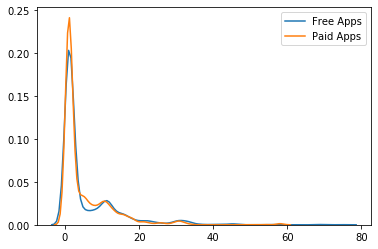

In [64]:
plt.figure("Test Plots")

sns.distplot(free_apps[['lang.num']], label='Free Apps', hist=False)
sns.distplot(paid_apps[['lang.num']], label='Paid Apps', hist=False)

plt.legend()
plt.show()

Text(0.5, 1.0, 'Vpp Device Based Licensing for paid apps')

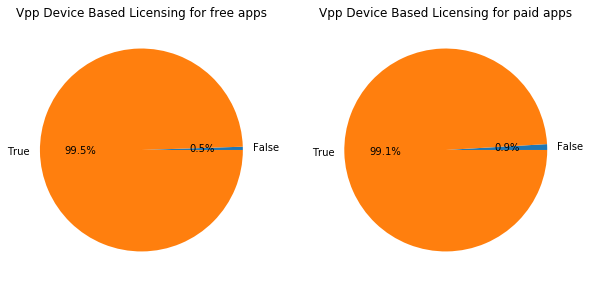

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
axes[0].pie(free_apps.groupby('vpp_lic').size(), autopct='%1.1f%%', labels=free_apps.groupby('vpp_lic').size().index)
axes[0].set_title('Vpp Device Based Licensing for free apps')
axes[1].pie(paid_apps.groupby('vpp_lic').size(), autopct='%1.1f%%', labels=free_apps.groupby('vpp_lic').size().index)
axes[1].set_title('Vpp Device Based Licensing for paid apps')

### Results:
In a given dataset, there are 3141 paid apps and 4056 free apps. According to the presented information, paid and free apps have very similar characteristics, including genre distribution, number of screenshots, number of supported languages and Vpp Device Based Licensing. However, some interesting differences still exist:
- the distribution of rating count is much more skewed to low values for paid apps than for free apps: 50% of free apps have less than 466 rates while 50% of paid apps have less than 193 rates. Furthermore, paid apps have significantly less rates in total than free apps and their high percentiles are almost incomparable: 95 percentile for free apps is 97612 rates while 95 percentile for paid apps is only 14202. The standard deviation of ratings of free apps is 4 times higher than ratings of paid apps, which prove that free apps ratings are much more dispersed.
- content-rating distribution significantly differs only in shares of 17+ and 9+ apps: while in free apps, 11% of apps are of 17+ and 11% are of 9+, in paid apps, 5.5% of apps are of 17+ and 17.5% are of 9+, so 9+ apps are much more represented in paid apps than in free ones while 17+ are significantly less represented.
- user rating in general barely differs between free and paid apps, but it is worth mentioning that free apps obtain 0-rating much more often than paid apps.

As for other characteristics, they barely differ between free and paid apps.